## Part 1
### The follow are four sets of Equatorial coordinates.  
1) RA, Dec = 05h35m17.0s, -05d23m28.0s<br>
2) RA, Dec = 18h00m03.4s, +66d33m42.4s<br>
3) RA, Dec = 272.62917, -22.677778 degrees<br>
4) RA, Dec = 266.404996, -28.936178 degrees<br>

#### Use Python (and not Google!) to figure out which of the four correspond to the following locations:
1) Galactic Center<br>
2) A good place for a JWST ultra deep field<br>
3) A Solar System Object<br>

In [1]:
#Start by importing the astropy SkyCoord and units packages, as we did in the example
from astropy.coordinates import SkyCoord
import astropy.units as u

In [5]:
#Uncomment next line to check out docstring (formatted comments) for the SkyCoord package
SkyCoord?

In [3]:
#Next, take the first coordinate.  
#Is there a transform you could do to figure out which of the three known locations it is?  
#Go back to the Solar System example to see how you did something similar then.
Object1 = SkyCoord('05h35m17.0s', '-05d23m28s', frame='icrs')
Object1.galactic
#Solar System Object


<SkyCoord (Galactic): (l, b) in deg
    (209.0131491, -19.38271135)>

In [15]:
#Once you have solved one object, move on to the others.  
#Remember, we have you four positions, but you're looking for three specific things, so one is a red herring.
Object2 = SkyCoord('018h00m3.4s', '-66d33m32.4s', frame='icrs')
Object2.galactic
#Deep field?

Object3 = SkyCoord('272.62917', '-22.677778', frame='icrs',unit='deg')
Object3.galactic
#None

Object4 = SkyCoord('266.404996', '-28.936178', frame='icrs',unit='deg')
Object4.galactic
#galactic Center

<SkyCoord (Galactic): (l, b) in deg
    (8.22070729, -1.71670178)>

In [3]:
#In this cell, list your answers:
#Galactic Center = Object #4
#JWST Ultra Deep Field = Object #2
#Solar System Object = Object #1

## Part 2
In class we saw where the Ecliplic plane lies in Galactic coordinates.  For this part of your assignment, we would like you to make a plot in Celestial coordinates (where the horizontal axis is Right Ascention from 0 to 24 hours, and the vertical axis is declination, from -90 to +90 degrees).  On this plot, draw curves for the postion of the Ecliptic Plane and Galactic plane, and label both the Ecliptic and Galactic poles.


Text(0,0.5,'Dec (deg)')

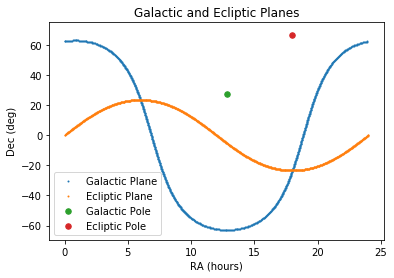

In [4]:
#Use this cell to make this plot
#Note that SkyCoord can handle arrays of multiple coordinates
#We recommend matplotlib.pyplot for plotting
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord as sc
import astropy.units as u

RA_Galactic = []
DEC_Galactic = []
RA_Ecliptic = []
DEC_Ecliptic = []
RA_Galactic_Pole = []
DEC_Galactic_Pole = []
RA_Ecliptic_Pole = []
DEC_Ecliptic_Pole = []

inc = 2
for x in range(0,360*inc):
    A = sc((x/inc)*u.deg, 0*u.deg, frame='galactic')
    B = sc((x/inc)*u.deg, 0*u.deg, frame='barycentrictrueecliptic')
    RA_Galactic.append(A.icrs.ra.hourangle)
    DEC_Galactic.append(A.icrs.dec.deg)
    RA_Ecliptic.append(B.icrs.ra.hourangle)
    DEC_Ecliptic.append(B.icrs.dec.deg)

A = sc(0*u.deg, 90*u.deg, frame='galactic')
B = sc(0*u.deg, 90*u.deg, frame='barycentrictrueecliptic')

RA_Galactic_Pole = A.icrs.ra.hourangle
DEC_Galactic_Pole = A.icrs.dec.deg
RA_Ecliptic_Pole = B.icrs.ra.hourangle
DEC_Ecliptic_Pole = B.icrs.dec.deg

plt.figure;
h1 = plt.scatter(RA_Galactic,DEC_Galactic,s=1)
h2 = plt.scatter(RA_Ecliptic,DEC_Ecliptic,s=1)
h3 = plt.scatter(RA_Galactic_Pole,DEC_Galactic_Pole,s=30)
h4 = plt.scatter(RA_Ecliptic_Pole,DEC_Ecliptic_Pole,s=30)

plt.legend((h1,h2,h3,h4),('Galactic Plane', 'Ecliptic Plane','Galactic Pole','Ecliptic Pole'))
plt.title('Galactic and Ecliptic Planes')
plt.xlabel('RA (hours)')
plt.ylabel('Dec (deg)')



## Part 3
Here are four sets of coordinates, with the coordinate system labeled.  We'd like to know which of these will be observable at midnight tonight from Austin.  List in the following cell what information you would need to know to answer this question.  If you are able to find that information, go ahead and attempt to answer it.  We will start with this on Tuesday.<br>
1) Ecliptic (l,b) = 88.55519406, +66.10205367 <br>
2) Ecliptic (l,b) = 276.38398872, -29.81144569 <br>
3) Galactic (l,b) = 148.18864288, -60.46831563 <br>
4) Galactic (l,b) = 151.41580923, -9.36984271 <br>

In [ ]:
#We would need to know the coordinate of each object in the ICRS celestial frame to ensure that the declination
#was between 90 and -30 degrees. The time of year would also have to be taken into account to ensure that the
#hour angle of the object was within an observable range (about +/- 4 hours from the meridian)